# Análise dos resultados de traduções

In [1]:
import pandas as pd
import matplotlib

BASE_PATH = '../results'

In [2]:
def treat_data(df, drop_dups=True, drop_na=True):
  df = df.copy()
  if drop_dups: df = df.drop_duplicates(subset=['source', 'target'])
  if drop_na: df = df.dropna()
  return df

In [3]:
cols = ['dataset', 'source', 'target', 'search_result', 'chrf_score', 'bleurt']
df_results = pd.DataFrame(columns=cols)
df_results_e5 = pd.DataFrame(columns=cols)

In [4]:
RANDOM_STATE=42

## DGT-TM

In [5]:
df = pd.read_csv(f'{BASE_PATH}/dgt_tm_en_es_result_scored.csv', sep='\t')
print(df.shape)
df.head()

(51185, 6)


,source,target,translation,search_result,chrf_score,bleurt
0,Commission Decision (EU) 2019/293,Decisión (UE) 2019/293 de la Comisión,Decisión (UE) 2019/293 de la Comisión,Decisión (UE) 2018/393 de la Comisión,0.814768,0.791992
1,of 8 November 2018,de 8 de noviembre de 2018,de 8 de noviembre de 2018,de 8 de noviembre de 2018,1.000000,0.968262
2,on the State aid SA.43785 (2018/C) (ex 2015/PN...,relativa a la ayuda estatal SA.43785 (2018/C) ...,relativa a la ayuda estatal SA.43785 (2018/C) ...,relativa a la ayuda estatal SA.34308 (2013/C) ...,0.414245,0.391357
3,(notified under document C(2018) 7308),[notificada con el número C(2018) 7308],[notificada con el número C(2018) 7308],[notificada con el número C(2018) 7304],0.941222,0.968262
4,(Only the Romanian text is authentic),(El texto en lengua rumana es el único auténtico),(El texto en lengua rumana es el único auténtico),(El texto en lengua rumana es el único auténtico),1.000000,1.021484


In [6]:
df.drop_duplicates().shape

(49635, 6)

In [7]:
df.isna().sum()

source           2
target           0
translation      0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [8]:
df.loc[df['source'].isna()]

,source,target,translation,search_result,chrf_score,bleurt
3863,NaN,N/D,N/D,S/N,0.111111,0.402100
35684,NaN,n/d,n.a.,n.d.,0.107527,0.662598


In [9]:
df = treat_data(df)
df.shape

(49633, 6)

In [10]:
df['chrf_score'].describe().apply("{0:.6f}".format)

count    49633.000000
mean         0.354347
std          0.221355
min          0.000000
25%          0.222727
50%          0.305714
75%          0.404218
max          1.000000
Name: chrf_score, dtype: object

In [11]:
df['bleurt'].describe().apply("{0:.6f}".format)

count    49633.000000
mean         0.352841
std          0.230898
min         -0.101501
25%          0.199463
50%          0.282715
75%          0.432373
max          1.160156
Name: bleurt, dtype: object

<Axes: >

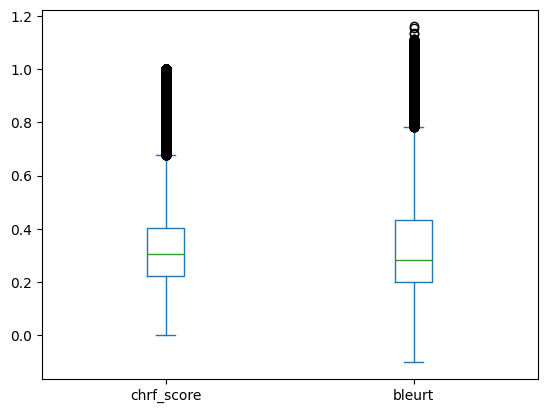

In [12]:
df[['chrf_score', 'bleurt']].plot.box()

In [13]:
df['dataset'] = 'DGT-TM'

In [14]:
df_results = df[cols]
df_results.shape

(49633, 6)

## DGT-TM - e5-base

In [15]:
df = pd.read_csv(f'{BASE_PATH}/dgt_tm_en_es_result_e5_scored.csv', sep='\t')
print(df.shape)
df.head()

(49634, 5)


,source,target,search_result,chrf_score,bleurt
0,Commission Decision (EU) 2019/293,Decisión (UE) 2019/293 de la Comisión,Decisión (UE) 2018/993 de la Comisión,0.819976,0.734863
1,of 8 November 2018,de 8 de noviembre de 2018,de 8 de noviembre de 2018,1.000000,0.968262
2,on the State aid SA.43785 (2018/C) (ex 2015/PN...,relativa a la ayuda estatal SA.43785 (2018/C) ...,relativa a la ayuda estatal SA.34308 (2013/C) ...,0.414245,0.391357
3,(notified under document C(2018) 7308),[notificada con el número C(2018) 7308],[notificada con el número C(2018) 1208],0.870816,0.730469
4,(Only the Romanian text is authentic),(El texto en lengua rumana es el único auténtico),(El texto en lengua rumana es el único auténtico),1.000000,1.021484


In [16]:
df.drop_duplicates().shape

(49634, 5)

In [17]:
df.isna().sum()

source           2
target           0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [18]:
df.loc[df['source'].isna()]

,source,target,search_result,chrf_score,bleurt
3746,NaN,N/D,S/N,0.111111,0.402100
34603,NaN,n/d,N.o/año,0.049020,0.353516


In [19]:
df = treat_data(df)
df.shape

(49632, 5)

In [20]:
df['chrf_score'].describe().apply("{0:.6f}".format)

count    49632.000000
mean         0.321946
std          0.219359
min          0.000000
25%          0.193001
50%          0.276065
75%          0.375466
max          1.000000
Name: chrf_score, dtype: object

In [21]:
df['bleurt'].describe().apply("{0:.6f}".format)

count    49632.000000
mean         0.335998
std          0.223529
min         -0.092651
25%          0.191895
50%          0.274414
75%          0.406311
max          1.160156
Name: bleurt, dtype: object

<Axes: >

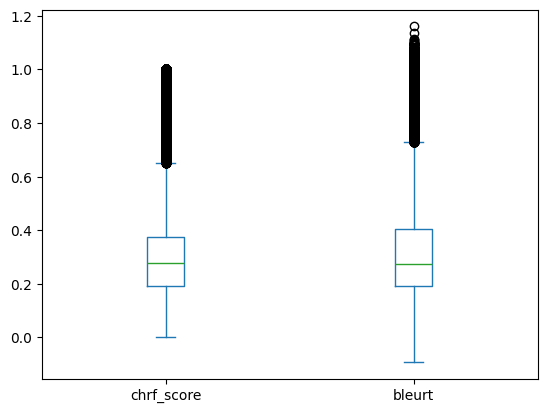

In [22]:
df[['chrf_score', 'bleurt']].plot.box()

In [23]:
df['dataset'] = 'DGT-TM'

In [24]:
df_results_e5 = df[cols]
df_results_e5.shape

(49632, 6)

## KDE

In [25]:
df = pd.read_csv(f'{BASE_PATH}/kde_de_en_result_scored.csv', sep='\t')
print(df.shape)
df.head()

(9543, 6)


,source,target,translation,search_result,chrf_score,bleurt
0,Telefon@item:inlistbox,Telephone,Telephone,Telephone,1.000000,0.835449
1,Helikopter@item:inlistbox,Helicopter,Helicopter,Helicopter,1.000000,0.586426
2,Applaus@item:inlistbox,Applause,Let's hear it.,Listen To,0.041667,0.057739
3,Gewehrschuss@item:inlistbox,Gunshot,Gunshot,Gunshot,1.000000,0.928711
4,Perkussion %1,Percussion %1,Percussion %1,Slide %1,0.073844,0.302490


In [26]:
df.isna().sum()

source           1
target           0
translation      0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [27]:
df.drop_duplicates().shape

(9232, 6)

In [28]:
df = treat_data(df)
df.shape

(9231, 6)

In [29]:
df['chrf_score'].describe()

count    9.231000e+03
mean     3.066734e-01
std      2.364068e-01
min      1.000000e-16
25%      1.349064e-01
50%      2.430093e-01
75%      3.993350e-01
max      1.000000e+00
Name: chrf_score, dtype: float64

In [30]:
df['bleurt'].describe()

count    9231.000000
mean        0.463424
std         0.217540
min        -0.007626
25%         0.323608
50%         0.446777
75%         0.600098
max         1.165039
Name: bleurt, dtype: float64

<Axes: >

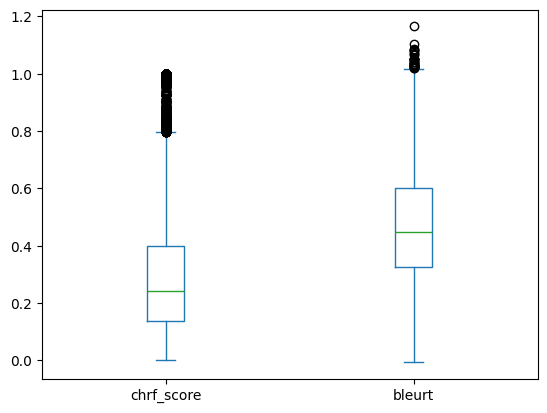

In [31]:
df[['chrf_score', 'bleurt']].plot.box()

In [32]:
df['dataset'] = 'KDE'

In [33]:
df_results = pd.concat([df_results, df[cols]])
df_results.shape

(58864, 6)

## KDE - e5

In [34]:
df = pd.read_csv(f'{BASE_PATH}/kde_de_en_result_e5_scored.csv', sep='\t')
print(df.shape)
df.head()

(9231, 5)


,source,target,search_result,chrf_score,bleurt
0,Telefon@item:inlistbox,Telephone,inbox:,3.831418e-02,0.037323
1,Helikopter@item:inlistbox,Helicopter,Helicopter,1.000000e+00,0.586426
2,Applaus@item:inlistbox,Applause,inbox:,1.000000e-16,0.042786
3,Gewehrschuss@item:inlistbox,Gunshot,Bulleted List - \\begin{itemize},7.246377e-02,0.056854
4,Perkussion %1,Percussion %1,Prompting %1,1.133297e-01,0.409180


In [35]:
df.isna().sum()

source           0
target           0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [36]:
df.drop_duplicates().shape

(9231, 5)

In [37]:
df = treat_data(df)
df.shape

(9231, 5)

In [38]:
df['chrf_score'].describe()

count    9.231000e+03
mean     2.391584e-01
std      2.171548e-01
min      1.000000e-16
25%      8.839471e-02
50%      1.685101e-01
75%      3.123581e-01
max      1.000000e+00
Name: chrf_score, dtype: float64

In [39]:
df['bleurt'].describe()

count    9231.000000
mean        0.387800
std         0.221461
min        -0.021591
25%         0.224915
50%         0.370605
75%         0.520508
max         1.165039
Name: bleurt, dtype: float64

<Axes: >

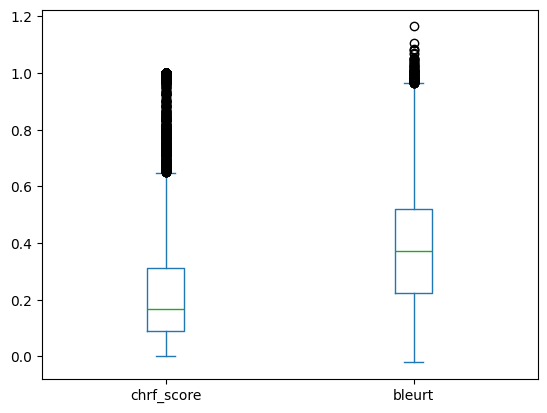

In [40]:
df[['chrf_score', 'bleurt']].plot.box()

In [41]:
df['dataset'] = 'KDE'

In [42]:
df_results_e5 = pd.concat([df_results_e5, df[cols]])
df_results_e5.shape

(58863, 6)

## Global Voices

In [43]:
df = pd.read_csv(f'{BASE_PATH}/global_voices_pt_en_result_scored.csv', sep='\t')
print(df.shape)
df.head()

(10000, 6)


,source,target,translation,search_result,chrf_score,bleurt
0,"Mitya Gutrin, ex-colega de Alexey e Irina, esc...","Mitya Gutrin, a former colleague of both Alexe...","Mitya Gutrin, former colleague of Alexey and I...",Marina Litvinovich (aka LJ user abstract2001) ...,0.203902,0.234253
1,O dinheiro raramente era devolvido e Kabanov a...,"The money was rarely returned, and Kabanov gen...",The money was rarely returned and Kabanov gene...,Bribes are described as “tea money” and hardly...,0.191022,0.392822
2,Gutrin escreveu:,Gutrin wrote:,Gutrin wrote:,Citizen wrote:,0.478502,0.379883
3,Sempre pensei que há um amplo abismo entre um ...,I always thought that a hefty chasm lies betwe...,I always thought there was a wide gap between ...,It feels like ferocious potential rapists and ...,0.250354,0.454346
4,"Agora sei que não é tão amplo quanto pensei, e...",Now I know that it isn't as large as I thought...,"Now I know it's not as broad as I thought, and...",So perhaps it's not all that bad. […],0.117007,0.430664


In [44]:
df.isna().sum()

source           0
target           0
translation      0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [45]:
df.drop_duplicates(subset=['source', 'target']).shape

(10000, 6)

In [46]:
df = treat_data(df)
df.shape

(10000, 6)

In [47]:
df['chrf_score'].describe()

count    1.000000e+04
mean     2.526606e-01
std      1.383117e-01
min      1.000000e-16
25%      1.759130e-01
50%      2.285026e-01
75%      2.889617e-01
max      9.965308e-01
Name: chrf_score, dtype: float64

In [48]:
df['bleurt'].describe()

count    10000.000000
mean         0.367365
std          0.150591
min          0.011833
25%          0.264160
50%          0.346924
75%          0.443115
max          0.973145
Name: bleurt, dtype: float64

<Axes: >

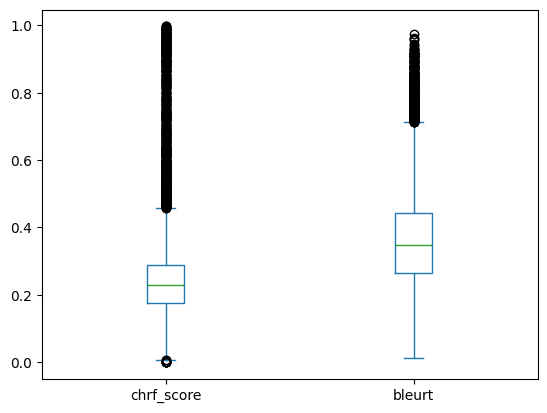

In [49]:
df[['chrf_score', 'bleurt']].plot.box()

In [50]:
df['dataset'] = 'Global Voices'

In [51]:
df_results = pd.concat([df_results, df[cols]])
df_results.shape

(68864, 6)

## Global Voices - e5

In [52]:
df = pd.read_csv(f'{BASE_PATH}/global_voices_pt_en_result_e5_scored.csv', sep='\t')
print(df.shape)
df.head()

(10000, 5)


,source,target,search_result,chrf_score,bleurt
0,"Mitya Gutrin, ex-colega de Alexey e Irina, esc...","Mitya Gutrin, a former colleague of both Alexe...",A actual governação assenta numa falsa democra...,0.156278,0.011253
1,O dinheiro raramente era devolvido e Kabanov a...,"The money was rarely returned, and Kabanov gen...","A rápida conclusão, porém, não convenceu seus ...",0.135283,-0.027145
2,Gutrin escreveu:,Gutrin wrote:,Sabitou Oumarou:,0.096050,0.291748
3,Sempre pensei que há um amplo abismo entre um ...,I always thought that a hefty chasm lies betwe...,A polícia catarinense ainda investiga as circu...,0.155246,-0.005928
4,"Agora sei que não é tão amplo quanto pensei, e...",Now I know that it isn't as large as I thought...,"Pelo que apreendi na altura e sei hoje, o Esta...",0.135139,0.096802


In [53]:
df.isna().sum()

source           0
target           0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [54]:
df.drop_duplicates(subset=['source', 'target']).shape

(10000, 5)

In [55]:
df = treat_data(df)
df.shape

(10000, 5)

In [56]:
df['chrf_score'].describe()

count    1.000000e+04
mean     1.592805e-01
std      8.576618e-02
min      1.000000e-16
25%      1.182343e-01
50%      1.483529e-01
75%      1.830875e-01
max      9.961577e-01
Name: chrf_score, dtype: float64

In [57]:
df['bleurt'].describe()

count    10000.000000
mean         0.078269
std          0.148327
min         -0.132690
25%         -0.013073
50%          0.038559
75%          0.114044
max          0.981445
Name: bleurt, dtype: float64

<Axes: >

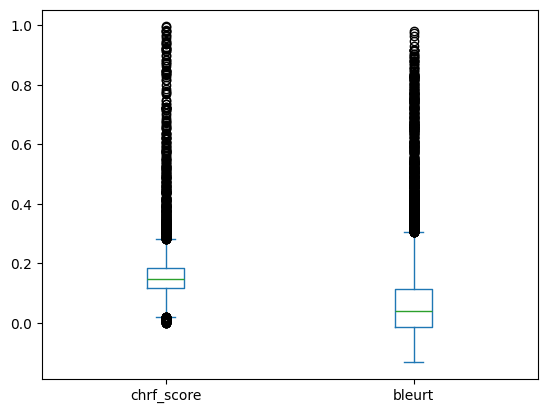

In [58]:
df[['chrf_score', 'bleurt']].plot.box()

In [59]:
df['dataset'] = 'Global Voices'

In [60]:
df_results_e5 = pd.concat([df_results_e5, df[cols]])
df_results_e5.shape

(68863, 6)

## United Nation

In [61]:
df = pd.read_csv(f'{BASE_PATH}/united_nation_en_fr_result_scored.csv', sep='\t')
print(df.shape)
df.head()

(10000, 6)


,source,target,translation,search_result,chrf_score,bleurt
0,19. Maintenance services. Provision under this...,Services d’entretien. Le montant prévu à cette...,19. Services d'entretien Le montant prévu à ce...,Indemnité de subsistance (missions). Le montan...,0.773737,0.394531
1,"Additionally, as indicated in paragraph 6 abov...","En outre, comme il a été noté plus haut au par...","En outre, comme il est indiqué au paragraphe 6...","Aux termes de ces arrangements, des dépenses c...",0.367461,0.258057
2,The total requirements under this heading are ...,"Au total, les sommes à prévoir à cette rubriqu...",Le montant total des ressources nécessaires à ...,Les ressources nécessaires sont estimées à 826...,0.674348,0.568848
3,20. Utilities. Provision for utilities is base...,"Éclairage, chauffage, énergie et eau. On a cal...",20. Services collectifs de distribution Les re...,Calculé sur la base d’une consommation journal...,0.273105,0.207153
4,The back-up power generation capacity is requi...,Les moyens de secours pour la production d’éle...,La capacité de production d'électricité de sec...,Fournitures d’entretien. Le montant prévu doit...,0.379619,0.230591


In [62]:
df.isna().sum()

source           0
target           0
translation      0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [63]:
df.drop_duplicates().shape

(9547, 6)

In [64]:
df = treat_data(df)
df.shape

(9545, 6)

In [65]:
df['chrf_score'].describe()

count    9.545000e+03
mean     3.905668e-01
std      2.141713e-01
min      1.000000e-16
25%      2.562613e-01
50%      3.275003e-01
75%      4.435641e-01
max      1.000000e+00
Name: chrf_score, dtype: float64

In [66]:
df['bleurt'].describe()

count    9545.000000
mean        0.323910
std         0.243481
min        -0.069580
25%         0.147095
50%         0.261719
75%         0.437988
max         1.076172
Name: bleurt, dtype: float64

<Axes: >

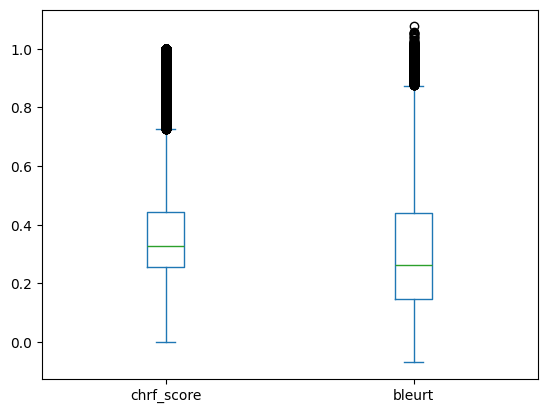

In [67]:
df[['chrf_score', 'bleurt']].plot.box()

In [68]:
df['dataset'] = 'United Nations'

In [69]:
df_results = pd.concat([df_results, df[cols]])
df_results.shape

(78409, 6)

## United Nation - e5

In [70]:
df = pd.read_csv(f'{BASE_PATH}/united_nation_en_fr_result_e5_scored.csv', sep='\t')
print(df.shape)
df.head()

(10000, 5)


,source,target,search_result,chrf_score,bleurt
0,19. Maintenance services. Provision under this...,Services d’entretien. Le montant prévu à cette...,Indemnité de subsistance (missions). Le montan...,0.773737,0.394531
1,"Additionally, as indicated in paragraph 6 abov...","En outre, comme il a été noté plus haut au par...",Le montant révisé des ressources prévues doit ...,0.342375,0.185669
2,The total requirements under this heading are ...,"Au total, les sommes à prévoir à cette rubriqu...",Les ressources nécessaires sont estimées à 826...,0.674348,0.568848
3,20. Utilities. Provision for utilities is base...,"Éclairage, chauffage, énergie et eau. On a cal...",Calculé sur la base d’une consommation moyenne...,0.365368,0.134155
4,The back-up power generation capacity is requi...,Les moyens de secours pour la production d’éle...,Le budget prévoit un montant de 50 000 dollars...,0.344966,0.230103


In [71]:
df.isna().sum()

source           0
target           0
search_result    0
chrf_score       0
bleurt           0
dtype: int64

In [72]:
df.drop_duplicates().shape

(9545, 5)

In [73]:
df = treat_data(df)
df.shape

(9545, 5)

In [74]:
df['chrf_score'].describe()

count    9.545000e+03
mean     3.899625e-01
std      2.081110e-01
min      1.000000e-16
25%      2.641316e-01
50%      3.337158e-01
75%      4.425631e-01
max      1.000000e+00
Name: chrf_score, dtype: float64

In [75]:
df['bleurt'].describe()

count    9545.000000
mean        0.311131
std         0.235989
min        -0.085449
25%         0.146118
50%         0.254150
75%         0.405762
max         1.076172
Name: bleurt, dtype: float64

<Axes: >

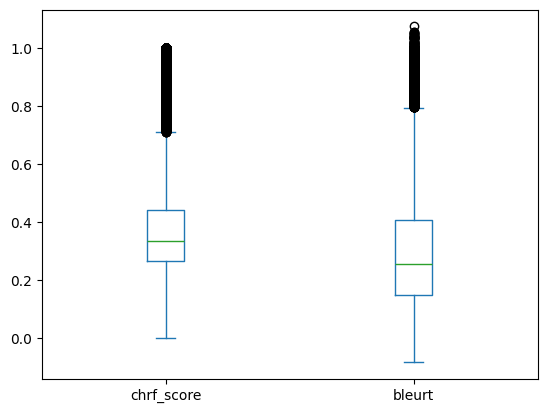

In [76]:
df[['chrf_score', 'bleurt']].plot.box()

In [77]:
df['dataset'] = 'United Nations'

In [78]:
df_results_e5 = pd.concat([df_results_e5, df[cols]])
df_results_e5.shape

(78408, 6)

## Comparação

In [79]:
df_results.loc[df_results['dataset']=='United Nations'].nsmallest(20, 'chrf_score')

,dataset,source,target,search_result,chrf_score,bleurt
3422,United Nations,A,A,Tenant compte des travaux entrepris par le Gro...,1.000000e-16,0.211670
3434,United Nations,C,C,(En milliers de dollars des États-Unis),1.000000e-16,0.042267
4963,United Nations,Notes,Notes,PARTIE I,1.000000e-16,0.121948
6039,United Nations,Economic and social planning,Planification économique et sociale,CONSEIL ÉCONOMIQUE ET SOCIAL,1.000000e-16,0.665527
8505,United Nations,BCG vaccine,BCG,Vaccination préventive,1.000000e-16,0.092102
6508,United Nations,(iii) Management audits; reviews and surveys i...,iii) Audits de gestion; analyses et enquêtes d...,"III. ARRANGEMENTS DE GESTION, CONTROLE ET EVAL...",1.712915e-03,0.172852
4333,United Nations,Appointments to fill vacancies in subsidiary o...,NOMINATIONS AUX SIÈGES DEVENUS VACANTS DANS LE...,Nominations aux sièges devenus vacants dans le...,2.099076e-03,0.658691
4761,United Nations,FIFTIETH ANNIVERSARY OF THE UNIVERSAL DECLARAT...,CINQUANTIÈME ANNIVERSAIRE DE LA DÉCLARATION UN...,Préparatifs du cinquantième anniversaire de la...,2.405002e-03,0.564941
6428,United Nations,(i) With interpretation,"2. Service des séances, interprétation et réda...",i),2.637131e-03,0.022049
2746,United Nations,MEASURES TO ELIMINATE INTERNATIONAL TERRORISM,MESURES VISANT À ÉLIMINER LE TERRORISME INTERN...,52/165. Mesures visant à éliminer le terrorism...,3.494060e-03,0.727539


In [80]:
print(df_results['dataset'].value_counts(), df_results_e5['dataset'].value_counts())

dataset
DGT-TM            49633
Global Voices     10000
United Nations     9545
KDE                9231
Name: count, dtype: int64 dataset
DGT-TM            49632
Global Voices     10000
United Nations     9545
KDE                9231
Name: count, dtype: int64


chrf_score    Axes(0.125,0.11;0.775x0.77)
dtype: object

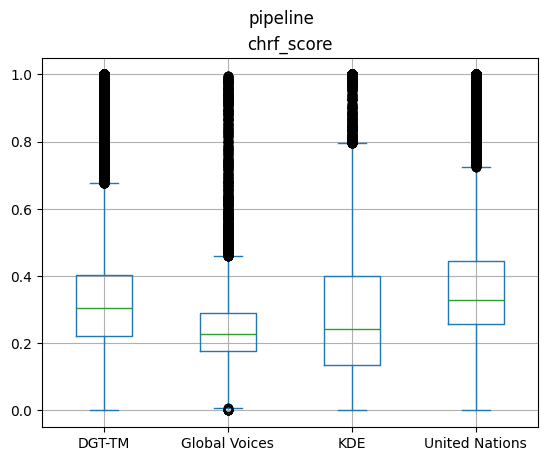

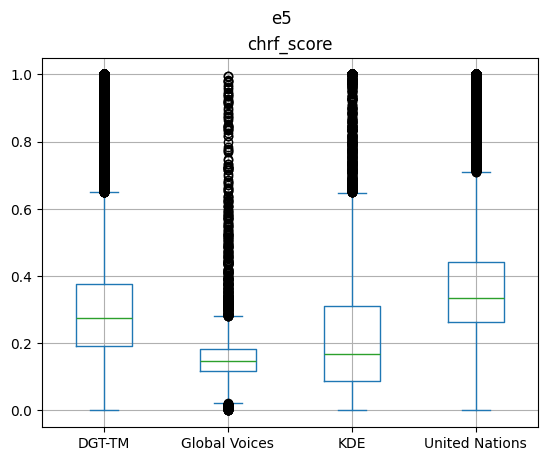

In [81]:
df_results.plot.box(column='chrf_score', by='dataset', grid=True, title='pipeline')
df_results_e5.plot.box(column='chrf_score', by='dataset', grid=True, title='e5')

bleurt    Axes(0.125,0.11;0.775x0.77)
dtype: object

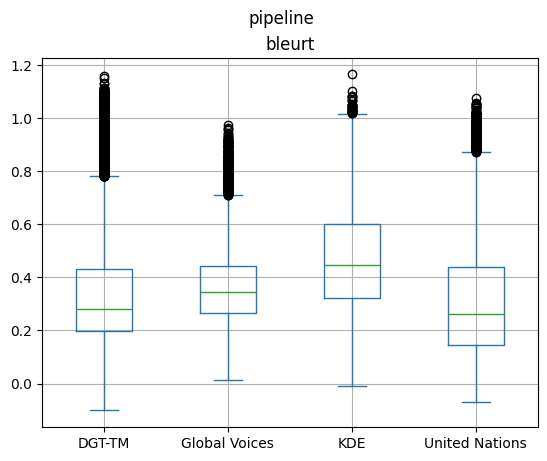

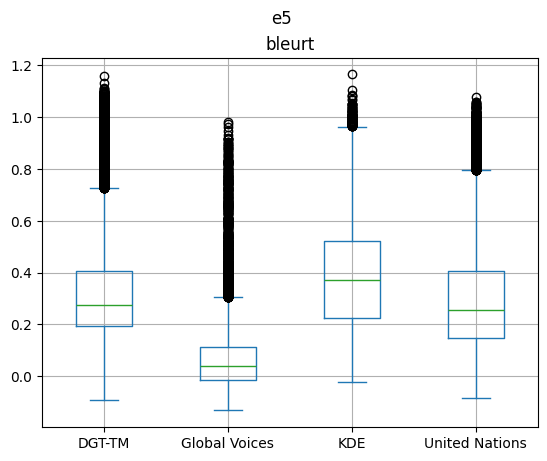

In [82]:
df_results.plot.box(column='bleurt', by='dataset', grid=True, title='pipeline')
df_results_e5.plot.box(column='bleurt', by='dataset', grid=True, title='e5')

In [83]:
# Computando valores das métricas por dataset
df_results.groupby('dataset').agg({'chrf_score': ['count', 'mean', 'max', 'min'], 'bleurt': ['mean', 'max', 'min']})

chrf_score                                      bleurt  \
                    count      mean       max           min      mean   
dataset                                                                 
DGT-TM              49633  0.354347  1.000000  1.000000e-16  0.352841   
Global Voices       10000  0.252661  0.996531  1.000000e-16  0.367365   
KDE                  9231  0.306673  1.000000  1.000000e-16  0.463424   
United Nations       9545  0.390567  1.000000  1.000000e-16  0.323910   

                                    
                     max       min  
dataset                             
DGT-TM          1.160156 -0.101501  
Global Voices   0.973145  0.011833  
KDE             1.165039 -0.007626  
United Nations  1.076172 -0.069580

In [84]:
# Computando valores das métricas por dataset
df_results_e5.groupby('dataset').agg({'chrf_score': ['count', 'mean', 'max', 'min'], 'bleurt': ['mean', 'max', 'min']})

chrf_score                                      bleurt  \
                    count      mean       max           min      mean   
dataset                                                                 
DGT-TM              49632  0.321946  1.000000  1.000000e-16  0.335998   
Global Voices       10000  0.159281  0.996158  1.000000e-16  0.078269   
KDE                  9231  0.239158  1.000000  1.000000e-16  0.387800   
United Nations       9545  0.389963  1.000000  1.000000e-16  0.311131   

                                    
                     max       min  
dataset                             
DGT-TM          1.160156 -0.092651  
Global Voices   0.981445 -0.132690  
KDE             1.165039 -0.021591  
United Nations  1.076172 -0.085449

### Teste de significância estatística

In [85]:
from scipy import stats

df_results = df_results.merge(df_results_e5, on=['source', 'target', 'dataset'], how='inner', suffixes=(None, '_e5'))
print(df_results['dataset'].value_counts())
df_results.head()

dataset
DGT-TM            49632
Global Voices     10000
United Nations     9545
KDE                9230
Name: count, dtype: int64


,dataset,source,target,search_result,chrf_score,bleurt,search_result_e5,chrf_score_e5,bleurt_e5
0,DGT-TM,Commission Decision (EU) 2019/293,Decisión (UE) 2019/293 de la Comisión,Decisión (UE) 2018/393 de la Comisión,0.814768,0.791992,Decisión (UE) 2018/993 de la Comisión,0.819976,0.734863
1,DGT-TM,of 8 November 2018,de 8 de noviembre de 2018,de 8 de noviembre de 2018,1.000000,0.968262,de 8 de noviembre de 2018,1.000000,0.968262
2,DGT-TM,on the State aid SA.43785 (2018/C) (ex 2015/PN...,relativa a la ayuda estatal SA.43785 (2018/C) ...,relativa a la ayuda estatal SA.34308 (2013/C) ...,0.414245,0.391357,relativa a la ayuda estatal SA.34308 (2013/C) ...,0.414245,0.391357
3,DGT-TM,(notified under document C(2018) 7308),[notificada con el número C(2018) 7308],[notificada con el número C(2018) 7304],0.941222,0.968262,[notificada con el número C(2018) 1208],0.870816,0.730469
4,DGT-TM,(Only the Romanian text is authentic),(El texto en lengua rumana es el único auténtico),(El texto en lengua rumana es el único auténtico),1.000000,1.021484,(El texto en lengua rumana es el único auténtico),1.000000,1.021484


Exemplos de tradução:

In [86]:
pd.set_option('display.max_colwidth', None)

In [87]:
df_results.loc[df_results['dataset']=='DGT-TM'].sample(1, random_state=RANDOM_STATE)

,dataset,source,target,search_result,chrf_score,bleurt,search_result_e5,chrf_score_e5,bleurt_e5
27688,DGT-TM,(ggg) paragraph 2.186 is replaced by the following:,ggg) el punto 2.186 se sustituye por el texto siguiente:,el punto 2.2 se sustituye por el texto siguiente:,0.795441,0.72168,"en el punto 2.2.b), el párrafo segundo se sustituye por el texto siguiente:",0.764371,0.563477


In [88]:
df_results.loc[df_results['dataset']=='KDE'].sample(1, random_state=RANDOM_STATE)

,dataset,source,target,search_result,chrf_score,bleurt,search_result_e5,chrf_score_e5,bleurt_e5
50815,KDE,Binden des Ports fehlgeschlagen,Port binding failed,Could not open a socket,0.077519,0.417236,Port:,0.113153,0.171753


In [89]:
df_results.loc[df_results['dataset']=='Global Voices'].sample(1, random_state=RANDOM_STATE)

,dataset,source,target,search_result,chrf_score,bleurt,search_result_e5,chrf_score_e5,bleurt_e5
65114,Global Voices,"Célia Possér, Presidente da Plataforma para Direitos Humanos e Equidade de Género reagiu em entrevista a RFI, condenando o acto:","In an interview with RFI, Célia Possér, President of the Platform for Human Rights and Gender Equality, condemned the apparent act of police brutality.","The spokesperson for the UN High Commission for Human Rights, Cecile Pouilly, stated:",0.189786,0.442627,"A principal vítima desses PUAs são pré-adolescentes que atingiram a idade de consentimento, 14 anos.",0.1445,0.032288


In [90]:
df_results.loc[df_results['dataset']=='United Nations'].sample(1, random_state=RANDOM_STATE)

,dataset,source,target,search_result,chrf_score,bleurt,search_result_e5,chrf_score_e5,bleurt_e5
74332,United Nations,"11.12 Together with the World Health Organization (WHO) and the World Meteorological Organization (WMO), UNEP undertook a study on climate change and human health, which was presented to the second Conference of the Parties to the United Nations Framework Convention on Climate Change in July 1996.","11.12 En collaboration avec l’Organisation mondiale de la santé (OMS) et l’Organisation météorologique mondiale (OMM), le PNUE a effectué une étude sur les changements climatiques et la santé, qui a été présentée à la deuxième Conférence des Parties à la Convention-cadre des Nations Unies sur les changements climatiques, en juillet 1996.","45. En coopération avec divers organes et organismes des Nations Unies, le HCDH/CPDH a pris une part active à la préparation et à la célébration de la quatrième Conférence mondiale des Nations Unies sur les femmes, tenue à Beijing en septembre 1995, et de la deuxième Conférence des Nations Unies sur les établissements humains (Habitat II), tenue à Istanbul en juin 1996.",0.405673,0.156006,"h) A pris note d'un projet élaboré par l'OMS, l'OMM et le PNUE de créer un réseau interinstitutions sur les changements climatiques et la santé en vue d'aider les pays à évaluer les incidences des changements climatiques sur la santé et d'améliorer l'accès à l'information pertinente;",0.380788,0.193604


In [91]:
def run_shapiro_test(dataset, metric):
  df_dataset = df_results.loc[df_results['dataset']==dataset]
  print(f'{dataset}, {metric}:')
  print(stats.shapiro(df_dataset[metric]))
  print(stats.shapiro(df_dataset[f'{metric}_e5']))

Verificar se as distribuições são normais.

- H0 - Distribuições são normais.
- alfa = 0,05
- H1 - Distribuições não são normais.

In [92]:
run_shapiro_test('DGT-TM', 'chrf_score')
run_shapiro_test('DGT-TM', 'bleurt')

DGT-TM, chrf_score:
ShapiroResult(statistic=0.8569687008857727, pvalue=0.0)
ShapiroResult(statistic=0.8517916202545166, pvalue=0.0)
DGT-TM, bleurt:
ShapiroResult(statistic=0.8724484443664551, pvalue=0.0)
ShapiroResult(statistic=0.872340738773346, pvalue=0.0)


d:\Documentos\Git\Github\translation-search\env\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [93]:
run_shapiro_test('Global Voices', 'chrf_score')
run_shapiro_test('Global Voices', 'bleurt')

Global Voices, chrf_score:
ShapiroResult(statistic=0.7947666645050049, pvalue=0.0)
ShapiroResult(statistic=0.644559919834137, pvalue=0.0)
Global Voices, bleurt:
ShapiroResult(statistic=0.9541143774986267, pvalue=0.0)
ShapiroResult(statistic=0.7630598545074463, pvalue=0.0)


In [94]:
run_shapiro_test('KDE', 'chrf_score')
run_shapiro_test('KDE', 'bleurt')

KDE, chrf_score:
ShapiroResult(statistic=0.868029773235321, pvalue=0.0)
ShapiroResult(statistic=0.810253381729126, pvalue=0.0)
KDE, bleurt:
ShapiroResult(statistic=0.9889736771583557, pvalue=3.698928108940899e-26)
ShapiroResult(statistic=0.975238025188446, pvalue=4.029809730569959e-37)


In [95]:
run_shapiro_test('United Nations', 'chrf_score')
run_shapiro_test('United Nations', 'bleurt')

United Nations, chrf_score:
ShapiroResult(statistic=0.8511727452278137, pvalue=0.0)
ShapiroResult(statistic=0.8629845380783081, pvalue=0.0)
United Nations, bleurt:
ShapiroResult(statistic=0.9145960211753845, pvalue=0.0)
ShapiroResult(statistic=0.902661919593811, pvalue=0.0)


Aqui, realiza-se o teste pareado de Wilcoxon, já que as distribuições dos scores em cada base não são normais. Em particular, Wilcoxon testa a hipótese nula de que duas amostras pareadas relacionadas vêm da mesma distribuição, ou seja, se a distribuição das diferenças x - y é simétrica em relação a zero.

In [96]:
def run_stat_tests(dataset, metric):
  df_dataset = df_results.loc[df_results['dataset']==dataset]
  print(f'{dataset}, {metric}:')
  print(stats.wilcoxon(df_dataset[metric], df_dataset[f'{metric}_e5']))

In [97]:
run_stat_tests('DGT-TM', 'chrf_score')
run_stat_tests('DGT-TM', 'bleurt')

DGT-TM, chrf_score:
WilcoxonResult(statistic=272344784.0, pvalue=0.0)
DGT-TM, bleurt:
WilcoxonResult(statistic=343050987.0, pvalue=2.0051308877443833e-122)


In [98]:
run_stat_tests('Global Voices', 'chrf_score')
run_stat_tests('Global Voices', 'bleurt')

Global Voices, chrf_score:
WilcoxonResult(statistic=4178635.0, pvalue=0.0)
Global Voices, bleurt:
WilcoxonResult(statistic=427518.5, pvalue=0.0)


In [100]:
run_stat_tests('KDE', 'chrf_score')
run_stat_tests('KDE', 'bleurt')

KDE, chrf_score:
WilcoxonResult(statistic=7271037.0, pvalue=1.5162961824392357e-257)
KDE, bleurt:
WilcoxonResult(statistic=6859780.5, pvalue=4.0590921203326925e-304)


In [99]:
run_stat_tests('United Nations', 'chrf_score')
run_stat_tests('United Nations', 'bleurt')

United Nations, chrf_score:
WilcoxonResult(statistic=13662972.0, pvalue=0.0005809801455253222)
United Nations, bleurt:
WilcoxonResult(statistic=12554564.0, pvalue=4.0672307240729645e-22)
